# 1.) Importing libraries

### 1. Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.

In [3]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r"C:\Users\andyc\Job Salary Analysis"

In [5]:
salary = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'salary.csv'), index_col = False)

In [6]:
salary.head()

,Unnamed: 0,ID,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,United Kingdom,White
1,1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,United States of America,Hispanic
2,2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,United States of America,Hispanic
4,4,4,52.0,Male,Master's,Director,20.0,200000.0,United States of America,Asian


In [7]:
#Dropping Unnamed: 0 column from salary
salary.drop(columns = ['Unnamed: 0'])

,ID,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,United Kingdom,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,United States of America,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,United States of America,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,United States of America,Asian
...,...,...,...,...,...,...,...,...,...
6697,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,United Kingdom,Mixed
6698,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6699,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6700,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


### 2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

#creating a subset with the suitable variables for my questions for exploratory visual analysis
sub_salary = salary[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary', 'Country', 'Race']]

In [10]:
#creating a subset with the suitable variables for my questions for exploratory visual analysis
sub_salary = salary[['Age', 'Years of Experience', 'Salary']]

In [11]:
sub_salary

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
6697,49.0,20.0,200000.0
6698,32.0,3.0,50000.0
6699,30.0,4.0,55000.0
6700,46.0,14.0,140000.0


### 3. Create a correlation matrix heatmap (colored).

In [13]:
#Create a correlation matrix using pandas
sub_salary.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.937609,0.727787
Years of Experience,0.937609,1.000000,0.808817
Salary,0.727787,0.808817,1.000000


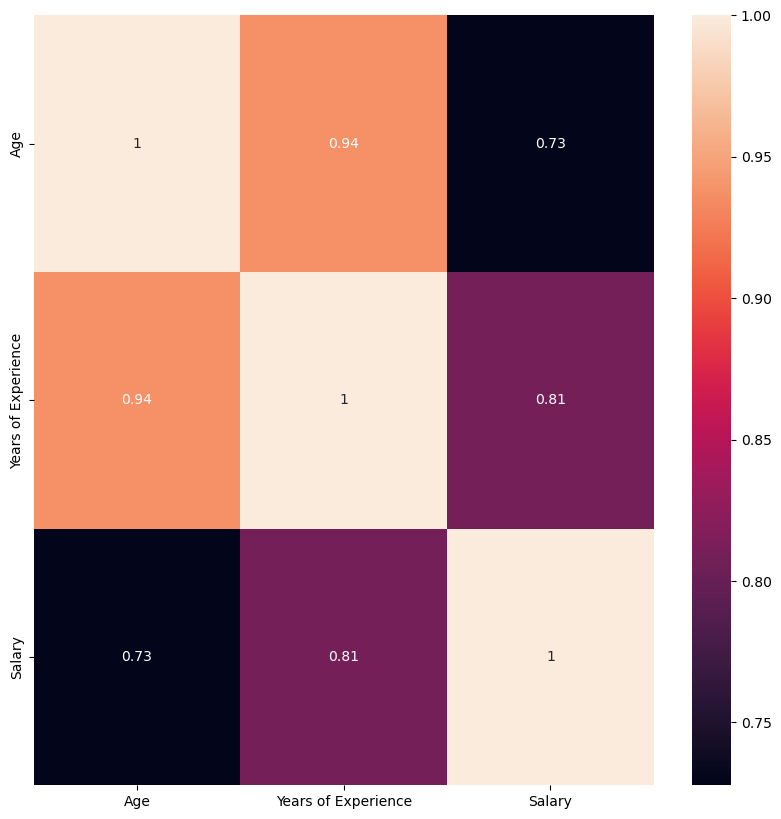

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots.
corr = sns.heatmap(sub_salary.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The coefficients in the plot are all above 0 and close to 1. This signifies a strong correlation relationship.

### 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

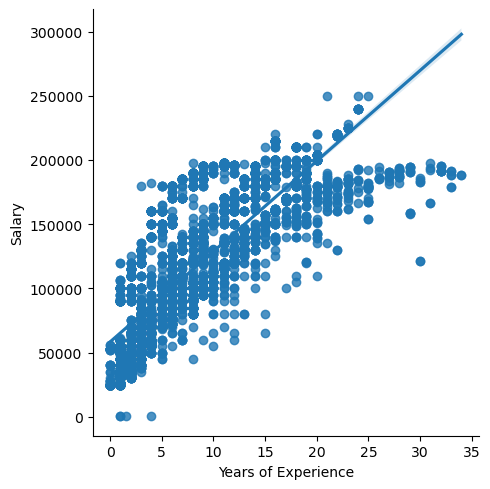

In [17]:
# Create a scatterplot for the "Salary" and "Years of Experience" columns in seaborn

sns.lmplot(x = 'Years of Experience', y = 'Salary', data = salary)

Based off the scatterplot above, we can see that there is an upward trend between the two variables "Salary" and " Years of Experience". The trend shows a strong correlation as most of the data ponits are close to the trend line.

### 5. Create a pair plot of the entire data set. 

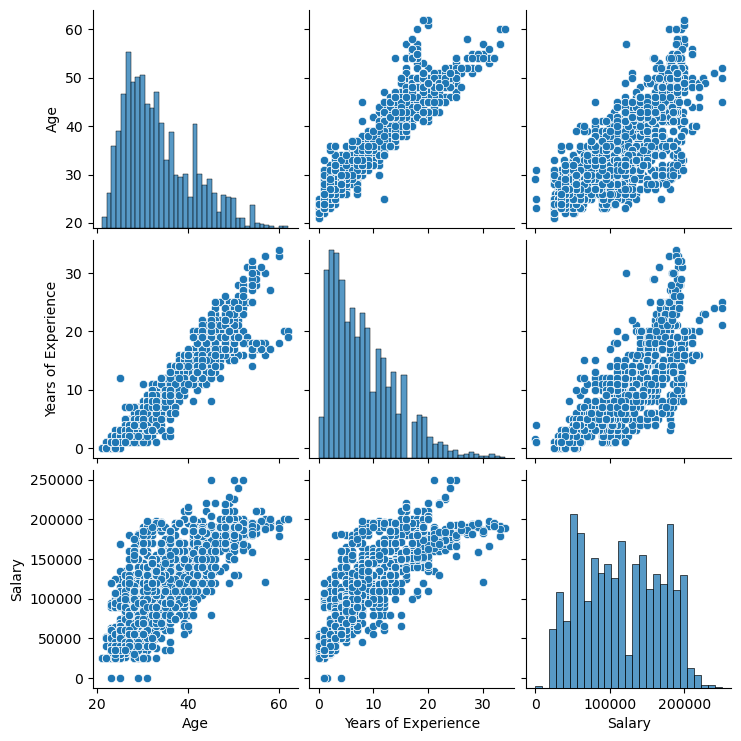

In [20]:
# Create a pair plot
pp_salary = sns.pairplot(sub_salary)

The unnamed and ID pair were removed. I'd like to explore the combination of Salary, Years of Experience, and Age pair plots.

### 6. Create a categorical plot and interpret the results.

<Axes: xlabel='Years of Experience', ylabel='Count'>

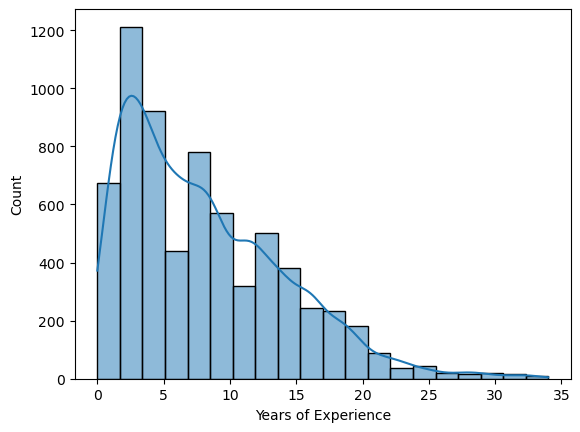

In [23]:
# Creating a histogram to visualization the distribution of the 'Years of Experience' column
sns.histplot(salary['Years of Experience'], bins = 20, kde = True)

As we can see from the chart above, the results show a left skew. Based off the graph, we con conclude that most of our data involves individuals with 0-10 years of experience.

<Axes: xlabel='Salary', ylabel='Count'>

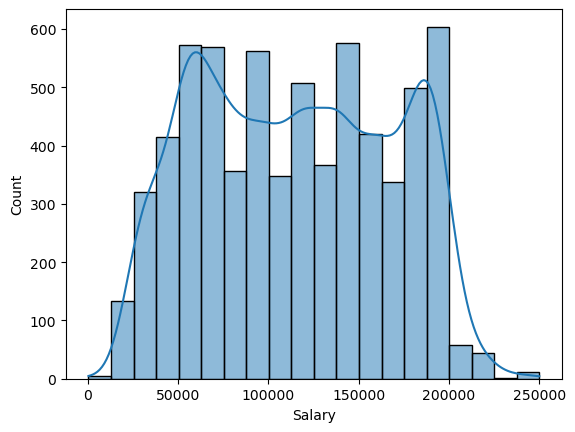

In [25]:
# Creating a histogram to visualization the distribution of the 'Salary' column
sns.histplot(salary['Salary'], bins = 20, kde = True)

Based on the histogram above, we can see that the graph is somewhat uniformed. We can conclude that there contains an evenly distributed number of salaries within each range.

<Axes: xlabel='Age', ylabel='Count'>

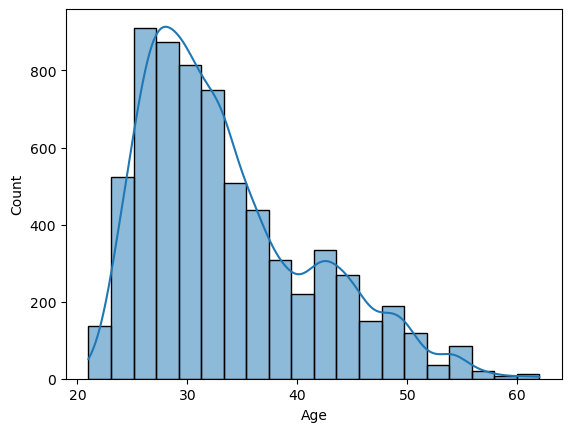

In [27]:
# Creating a histogram to visualization the distribution of the 'Age' column
sns.histplot(salary['Age'], bins = 20, kde = True)

As seen from the chart above, the graph is skewed right. We can conclude that a majority of our data contains individuals between the age of 25 and 35.

In [29]:
# Creating categories
salary.loc[salary['Years of Experience'] < 5, 'Experience Level'] = 'Under 5 Years of Experience'

In [30]:
# Creating categories
salary.loc[(salary['Years of Experience'] >= 5) & (salary['Years of Experience'] < 10), 'Experience Level'] = '5-10 Years of Experience'

In [31]:
# Creating categories
salary.loc[salary['Years of Experience'] >= 10, 'Experience Level'] = 'Over 10 Years of Experience'

In [32]:
salary['Experience Level'].value_counts(dropna = False)

Experience Level
Under 5 Years of Experience    2407
Over 10 Years of Experience    2297
5-10 Years of Experience       1998
Name: count, dtype: int64

In [33]:
salary.columns

Index(['Unnamed: 0', 'ID', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race', 'Experience Level'],
      dtype='object')

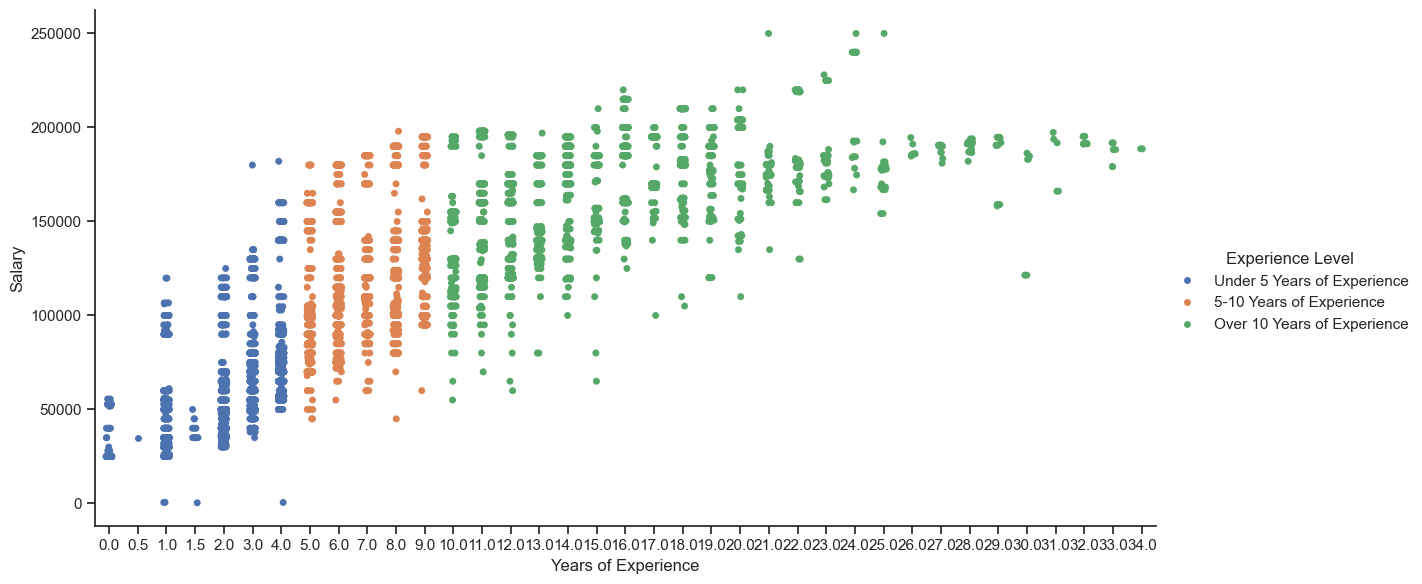

In [34]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
cat_salary = sns.catplot(x="Years of Experience", y="Salary", hue="Experience Level", data=salary, height=6, aspect=2)

### 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

Questions to Explore:
-	Which job titles have the highest and lowest average salaries overall? 
-	Which country has the highest average salary?
-	How do salaries vary across different countries for the same job titles?
-	How does the level of education affect salary for different job titles?
-	Is there a significant difference in salary based on gender or race?
-	How does age affect salary for different job titles?
-	Does higher years of experience equivalate to higher salary?

Without any data or facts, I believe that the Level of Education can greatly affect salary for different job titles and that higher years of exerpience equivalate to higher salary.

### 8. Define any hypotheses that you can at this point. You’ll be testing these later on.

If an individual has more years of experience, then they are likely to earn a higher salary.

In [40]:
#exporting data, salary to csv file.
salary.to_csv(os.path.join(path, '02 Data','Prepared Data', 'salary2.csv'))